#### Load tensorflow

In [1]:
import tensorflow as tf

#### Collect Data

We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [2]:
#Download dataset
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#Check number of training examples and size of each example
X_train.shape

(60000, 28, 28)

In [4]:
#Check number of test examples and size of each example
X_test.shape

(10000, 28, 28)

Visualize data

In [5]:
import matplotlib.pyplot as plt
import numpy as np

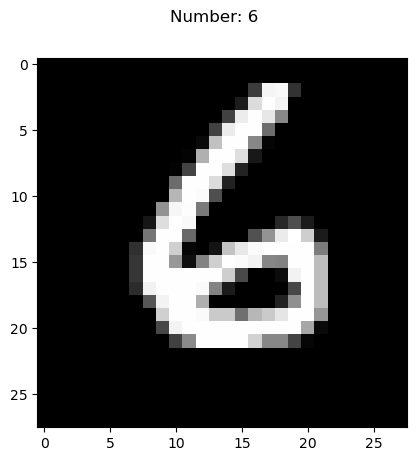

In [6]:
img_num = np.random.randint(0, X_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(X_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

#### Prepare Labels
Convert Output label to multiple values

In [7]:
#Label for an example
y_test[0]

7

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
#Label for same example after one hot encoding
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Build the Graph

In [10]:
tf.keras.backend.clear_session()
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

Metal device set to: Apple M1 Max


2024-03-15 22:59:18.565108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-15 22:59:18.565703: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'batch_normalization')>

Add Hidden Layers

In [12]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='tanh'))

In [13]:
model.output

<KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'dense')>

In [14]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='tanh'))

In [15]:
model.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_1')>

In [16]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='tanh'))

In [17]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='tanh'))

In [18]:
model.output

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'dense_3')>

Add Output Layer

In [19]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Compile the Model

In [20]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

Review model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                        

#### Train the model

In [22]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_tanh_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [23]:
model.fit(X_train,y_train,          
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 1/100


2024-03-15 23:00:41.586059: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-15 23:00:41.733018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.5741 - accuracy: 0.8513

2024-03-15 23:01:04.883781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.91060, saving model to mnist_tanh_v1.h5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5741 - accuracy: 0.8513 - val_loss: 0.3168 - val_accuracy: 0.9106
Epoch 2/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.2914 - accuracy: 0.9172
Epoch 2: val_accuracy improved from 0.91060 to 0.93040, saving model to mnist_tanh_v1.h5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2914 - accuracy: 0.9173 - val_loss: 0.2491 - val_accuracy: 0.9304
Epoch 3/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.2289 - accuracy: 0.9348
Epoch 3: val_accuracy improved from 0.93040 to 0.93700, saving model to mnist_tanh_v1.h5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2290 - accuracy: 0.9348 - val_loss: 0.2146 - val_accuracy: 0.9370
Epoch 4/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.9460
Epoch 4: val_accuracy improved fr

In [24]:
model.save('mnist_tanh_v1.h5')

In [ ]:
!ls -l

Load a saved model

In [25]:
model = tf.keras.models.load_model('mnist_tanh_v1.h5')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                        

### Model Prediction

In [29]:
import numpy as np

What input shape model is expecting?

In [27]:
model.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'reshape_input')>

Predicting on first example

In [28]:
X_test[0].shape

(28, 28)

In [29]:
model.predict(X_test[0])

ValueError: in user code:

    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/layers/reshaping/reshape.py", line 111, in _fix_unknown_dimension
        raise ValueError(msg)

    ValueError: Exception encountered when calling layer "reshape" (type Reshape).
    
    total size of new array must be unchanged, input_shape = [28], output_shape = [784]
    
    Call arguments received by layer "reshape" (type Reshape):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)


Why are we getting the error?

In [30]:
X_test[0].shape

(28, 28)

Building a Batch

In [31]:
input_data = np.expand_dims(X_test[0], axis=0)
input_data.shape

(1, 28, 28)

Model Prediction

In [32]:
pred = model.predict(input_data)
pred

2024-03-15 23:52:51.301692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 735ms/step


array([[2.7182386e-07, 3.1691386e-07, 6.4523938e-08, 3.3013609e-06,
        1.0703609e-08, 3.6974122e-08, 2.9654482e-10, 9.9999535e-01,
        2.1134795e-08, 5.9638273e-07]], dtype=float32)

In [33]:
pred.shape

(1, 10)

In [34]:
pred[0]

array([2.7182386e-07, 3.1691386e-07, 6.4523938e-08, 3.3013609e-06,
       1.0703609e-08, 3.6974122e-08, 2.9654482e-10, 9.9999535e-01,
       2.1134795e-08, 5.9638273e-07], dtype=float32)

Predicted Class

In [35]:
np.argmax(pred[0])

7

In [36]:
np.max(pred[0])

0.99999535

Actual Class

In [37]:
np.argmax(y_test[0])

7

Visual confirmation

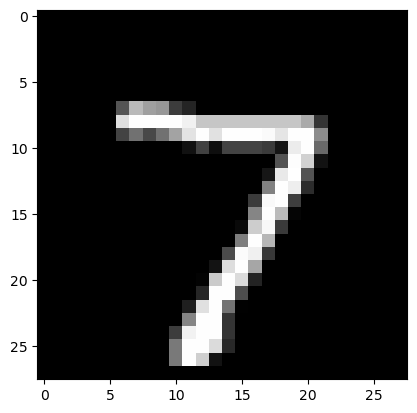

In [38]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.imshow(X_test[0],cmap='gray')
plt.show()